## Introdução a data science e vizualização de dados, utilizando pandas e seaborn

In [2]:
import pandas as pd

In [3]:
notas = pd.read_csv('ratings.csv')

In [4]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
#formato dos dados
notas.shape

(100836, 4)

In [6]:
notas.columns = ["usuarioID", "filmeID", "nota", "momento"]

In [7]:
notas.head()

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
#quais valores aparecem na coluna nota
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [9]:
#quantas vezes os valores aparecem na coluna nota
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [10]:
print(notas['nota'].mean())
print(notas['nota'].median())

3.501556983616962
3.5


<AxesSubplot:ylabel='Frequency'>

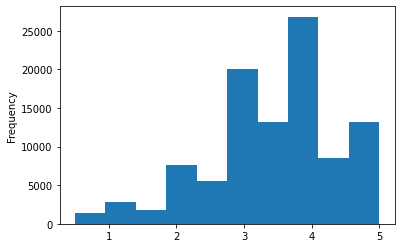

In [11]:
notas.nota.plot(kind = 'hist')

In [12]:

notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [13]:
import seaborn as sns

<AxesSubplot:xlabel='nota'>

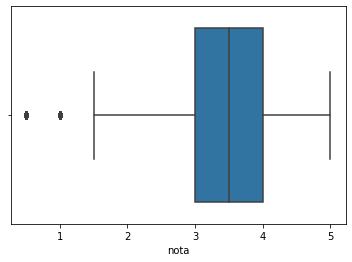

In [14]:
sns.boxplot(notas.nota)

In [15]:
filmes = pd.read_csv('movies.csv')

In [16]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
filmes.columns = ['filmeID', 'titulo', 'genero']

In [18]:
filmes.head()

,filmeID,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### Analisando algumas notas especificas por filme

In [19]:
notas.query('filmeID == 1').nota.mean()

3.9209302325581397

In [20]:
notas.query('filmeID == 2').nota.mean()

3.4318181818181817

In [21]:
medias_por_filme = notas.groupby('filmeID').mean().nota
medias_por_filme.head()

filmeID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

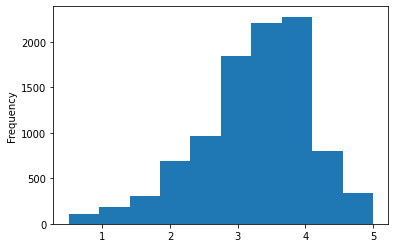

In [22]:
medias_por_filme.plot(kind='hist')

<AxesSubplot:xlabel='nota'>

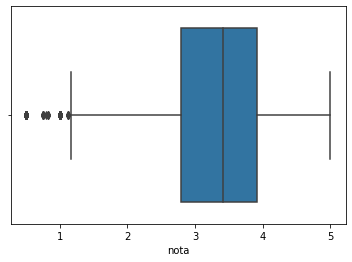

In [23]:
sns.boxplot(medias_por_filme)

<AxesSubplot:xlabel='nota'>

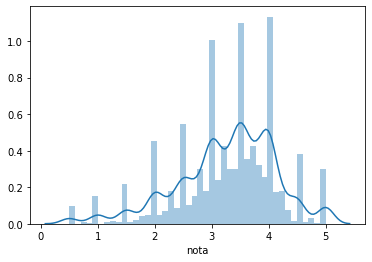

In [24]:
sns.distplot(medias_por_filme #bins=30 
            )

In [25]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Histograma da media dos filmes')

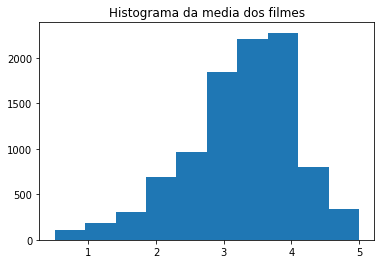

In [26]:
plt.hist(medias_por_filme)
plt.title('Histograma da media dos filmes')

In [27]:
filmes.head(2)

,filmeID,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [31]:
notas_toystory = notas.query('filmeID == 1')
notas_jumanji = notas.query('filmeID == 2')
print(len(notas_toystory))
print(len(notas_jumanji))

215
110


In [35]:
print('Nota média do Toy Story: %.2f' % notas_toystory.nota.mean())
print('Nota média do Jumanji: %.2f' %notas_jumanji.nota.mean())

Nota média do Toy Story: 3.92
Nota média do Jumanji: 3.43


In [36]:
print('Nota mediana do Toy Story: %.2f' % notas_toystory.nota.median())
print('Nota mediana do Jumanji: %.2f' %notas_jumanji.nota.median())

Nota mediana do Toy Story: 4.00
Nota mediana do Jumanji: 3.50


{'whiskers': [<matplotlib.lines.Line2D at 0x7f0c775a5a10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0c7758e0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0c83c3c550>,
 'medians': [<matplotlib.lines.Line2D at 0x7f0c7755d2d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0c775cced0>,
 'means': []}

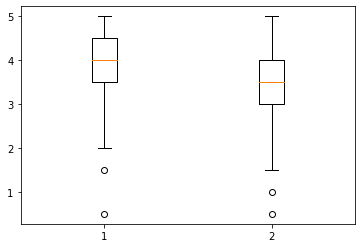

In [38]:
plt.boxplot([notas_toystory.nota,notas_jumanji.nota])

In [40]:
notas_jumanji.nota.std()

0.8817134921476455